In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=DeprecationWarning)


from sklearn.metrics import mean_squared_error, mean_absolute_error

import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import xgboost as xgb
from xgboost import plot_importance

from joblib import dump, load

In [28]:
df_ativos = pd.read_csv(r"C:\Users\Alexandre\OneDrive\Documentos\1. PRO\Data Science\Projeto Integrador\Dados\df_ativos\df_ativos_processed_rev4.csv", index_col = 0)
df_ativos

,Ativo,Close,Volume,1: ln(C/C-1),2: ln(C-1/C-2),3: ln(C-2/C-3),4: ln(C-3/C-4),5: ln(H/O),6: ln(H/O-1),7: ln(H/O-2),...,17: ATR 5d,17b: ATR 10d,17c: ATR 14d,18: MI 3d,18b: MI 7d,19: RSI 5d,19b: RSI 10d,19c: RSI 14d,20: ln(Vol/Vol-1),21: ln(Vol-1/Vol-2)
2014-10-01,XMR-USD,1.076710,65140,-0.016527,0.059606,-0.059705,-0.068457,0.008003,0.045624,-0.002255,...,0.101220,0.127626,0.170490,-0.020110,-0.305760,21.528366,44.702402,26.377827,-0.231326,-0.021785
2014-10-01,BTC-USD,362.299011,26229400,-0.008641,0.030109,-0.004555,-0.057539,0.010149,0.039853,0.037622,...,15.407996,17.614697,22.595568,6.433990,-39.589996,26.224741,43.217649,31.461697,-0.280069,0.065781
2014-10-01,LTC-USD,3.772660,1172180,-0.010372,0.052283,0.003198,-0.043582,0.007305,0.057474,0.060904,...,0.184038,0.232394,0.276422,0.195330,-0.238230,49.484647,56.977367,35.151758,-0.739840,0.360663
2014-10-01,XRP-USD,0.004753,64998,0.022989,-0.013050,-0.115679,0.115679,0.026974,0.014140,-0.100971,...,0.000364,0.000261,0.000272,-0.000530,0.000084,54.815851,55.176337,37.495167,-0.520216,-0.110047
2014-10-01,XLM-USD,0.002336,70180,-0.108792,-0.000311,0.011901,-0.027654,0.019066,0.017205,0.035026,...,0.000353,0.000457,0.000551,-0.000294,-0.001010,37.351198,36.751362,47.186400,1.200322,-0.441454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-10,THETA-USD,7.277748,313640625,0.022782,0.055899,-0.078676,0.008999,0.046528,0.101348,0.022183,...,0.588351,0.574432,0.546775,0.000035,1.038108,44.276589,63.879250,63.521194,-0.092111,0.027526
2021-08-10,FIL-USD,73.149849,621114680,-0.015608,0.049901,-0.071522,0.076856,0.028505,0.076606,0.005017,...,6.289270,4.915404,4.128175,-2.530663,12.540874,71.609488,77.099052,78.580838,-0.160927,0.059444
2021-08-10,XLM-USD,0.385290,685222152,0.035555,0.040420,-0.063779,0.072823,0.050259,0.090640,0.023069,...,0.022158,0.020179,0.019635,0.003758,0.035849,71.943048,64.268267,71.750600,0.097456,0.031211
2021-08-10,XMR-USD,281.944458,228553925,-0.014969,0.050606,-0.053536,0.029749,0.003860,0.051646,-0.002090,...,15.638623,16.262886,15.807799,-4.807037,40.976334,63.420668,64.096207,67.960800,0.001610,0.004350


In [11]:
ativos = list(df_ativos['Ativo'].unique())
ativos

['XMR-USD',
 'BTC-USD',
 'LTC-USD',
 'XRP-USD',
 'XLM-USD',
 'DASH-USD',
 'DOGE-USD',
 'ETH-USD',
 'USDT-USD',
 'ETC-USD',
 'NEO-USD',
 'MIOTA-USD',
 'EOS-USD',
 'BCH-USD',
 'BNB-USD',
 'MKR-USD',
 'TRX-USD',
 'LINK-USD',
 'ADA-USD',
 'XTZ-USD',
 'FIL-USD',
 'THETA-USD']

In [12]:
df_models_rev_3 = pd.read_excel(r"C:\Users\Alexandre\OneDrive\Documentos\1. PRO\Data Science\Projeto Integrador\Modelos\df_models_rev3.xlsx", index_col=0)
df_models_rev_3 

,Ativo,learning_rate,n_estimators,max_depth,subsample,min_child_weight,reg_alpha,reg_lambda,MAPE_test,MSE_test,MAE_test,RMSE_test
0,BTC-USD,1.0,500,2,0.7,1,0.0010,1.00000,0.353602,1.677814e+10,1.410557e+10,2.820000e+14
1,DOGE-USD,0.5,700,5,0.9,1,0.0010,0.00001,0.756510,2.635250e-01,2.376960e-01,6.940000e+04
2,XMR-USD,0.3,700,2,0.9,1,0.0010,0.05000,0.180541,6.903402e+07,5.321247e+07,4.770000e+09
3,LTC-USD,0.3,500,4,0.7,5,0.0000,0.01000,0.236362,5.846699e+07,4.668019e+07,3.420000e+09
4,DASH-USD,0.3,100,3,0.7,3,0.0010,0.01000,0.495103,1.513415e+08,9.678555e+07,2.290000e+10
5,XLM-USD,0.3,700,2,0.7,1,0.0010,0.01000,0.275040,1.169610e-01,9.683000e-02,1.370000e+04
6,XRP-USD,0.3,300,4,0.5,3,0.0001,0.01000,0.253284,4.409000e-01,2.716760e-01,1.940000e+05
7,USDT-USD,0.3,100,4,0.9,1,0.0001,0.00001,0.001026,2.006000e-03,1.027000e-03,4.020000e+00
8,ETH-USD,0.5,100,2,0.7,3,0.0000,0.01000,0.216558,7.067284e+08,5.758997e+08,4.990000e+11
9,ETC-USD,0.3,100,5,0.9,3,0.0000,0.00001,0.498553,3.249640e+07,2.409386e+07,1.060000e+09


In [13]:
df_models_rev_4 = pd.read_csv(r"C:\Users\Alexandre\OneDrive\Documentos\1. PRO\Data Science\Projeto Integrador\Modelos\df_models_rev4.csv", index_col=0)
df_models_rev_4

,Ativo,learning_rate,n_estimators,max_depth,subsample,colsample_bytree,min_child_weight,gamma,reg_alpha,reg_lambda,MAPE_test,MSE_test,MAE_test,RMSE_test
0,BTC-USD,0.5,400,3,0.8,0.5,5.0,1,0.0001,0.0100,0.249453,11612.339545,9676.089070,1.348464e+08
1,DOGE-USD,0.5,400,3,0.8,0.5,0.5,0,0.0000,1.0000,0.779242,0.269767,0.245603,7.277413e-02
2,XMR-USD,0.5,400,3,0.8,1.0,5.0,0,0.0100,0.0100,0.194250,71.630218,55.249887,5.130888e+03
3,LTC-USD,0.5,50,3,1.0,0.5,0.5,0,0.0000,0.0001,0.229049,59.739026,45.508451,3.568751e+03
4,DASH-USD,0.5,400,4,0.8,1.0,0.5,1,0.0000,0.0100,0.523825,161.919757,102.575392,2.621801e+04
5,XLM-USD,0.5,50,3,0.8,0.8,0.5,0,0.0100,0.0100,0.295176,0.132838,0.106869,1.764600e-02
6,XRP-USD,0.5,50,3,0.8,0.5,0.5,0,0.0001,1.0000,0.271004,0.409900,0.276322,1.680181e-01
7,USDT-USD,0.3,50,6,1.0,1.0,5.0,0,0.0001,1.0000,0.000711,0.000877,0.000711,7.685853e-07
8,ETH-USD,0.5,100,6,1.0,1.0,0.5,0,0.0001,1.0000,0.219183,798.833288,608.765842,6.381346e+05
9,ETC-USD,0.3,400,6,1.0,1.0,0.5,0,0.0001,1.0000,0.604364,35.616277,30.261774,1.268519e+03


In [16]:
#Ajustando df_models_rev_3 com parâmetros que não foram para tunning (estão default) mas não constam na tabela:
df_models_rev_3.loc[:,'colsample_bytree'] = 1
df_models_rev_3.loc[:,'gamma'] = 0
df_models_rev_3

,Ativo,learning_rate,n_estimators,max_depth,subsample,min_child_weight,reg_alpha,reg_lambda,MAPE_test,MSE_test,MAE_test,RMSE_test,colsample_bytree,gamma
0,BTC-USD,1.0,500,2,0.7,1,0.0010,1.00000,0.353602,1.677814e+10,1.410557e+10,2.820000e+14,1,0
1,DOGE-USD,0.5,700,5,0.9,1,0.0010,0.00001,0.756510,2.635250e-01,2.376960e-01,6.940000e+04,1,0
2,XMR-USD,0.3,700,2,0.9,1,0.0010,0.05000,0.180541,6.903402e+07,5.321247e+07,4.770000e+09,1,0
3,LTC-USD,0.3,500,4,0.7,5,0.0000,0.01000,0.236362,5.846699e+07,4.668019e+07,3.420000e+09,1,0
4,DASH-USD,0.3,100,3,0.7,3,0.0010,0.01000,0.495103,1.513415e+08,9.678555e+07,2.290000e+10,1,0
5,XLM-USD,0.3,700,2,0.7,1,0.0010,0.01000,0.275040,1.169610e-01,9.683000e-02,1.370000e+04,1,0
6,XRP-USD,0.3,300,4,0.5,3,0.0001,0.01000,0.253284,4.409000e-01,2.716760e-01,1.940000e+05,1,0
7,USDT-USD,0.3,100,4,0.9,1,0.0001,0.00001,0.001026,2.006000e-03,1.027000e-03,4.020000e+00,1,0
8,ETH-USD,0.5,100,2,0.7,3,0.0000,0.01000,0.216558,7.067284e+08,5.758997e+08,4.990000e+11,1,0
9,ETC-USD,0.3,100,5,0.9,3,0.0000,0.00001,0.498553,3.249640e+07,2.409386e+07,1.060000e+09,1,0


In [24]:
df_models_final = pd.DataFrame(columns = ['Ativo', 'learning_rate', 'n_estimators', 'max_depth', 'subsample', 'colsample_bytree', 'min_child_weight', 'gamma','reg_alpha', 'reg_lambda', 'MAPE_test'])

for index in range(0, len(ativos)):
    mape_3 = df_models_rev_3.loc[index,'MAPE_test']
    mape_4 = df_models_rev_4.loc[index,'MAPE_test']
    
    for col in df_models_final.columns:
    
        if mape_3 <= mape_4: # Escolho os params da rev3
            df_models_final.loc[index,col] = df_models_rev_3.loc[index,col]
            
        else:                # Escolho os params da rev4
            df_models_final.loc[index,col] = df_models_rev_4.loc[index,col]
            
            
df_models_final
        

,Ativo,learning_rate,n_estimators,max_depth,subsample,colsample_bytree,min_child_weight,gamma,reg_alpha,reg_lambda,MAPE_test
0,BTC-USD,0.5,400,3,0.8,0.5,5.0,1,0.0001,0.01,0.249453
1,DOGE-USD,0.5,700,5,0.9,1,1,0,0.001,0.00001,0.75651
2,XMR-USD,0.3,700,2,0.9,1,1,0,0.001,0.05,0.180541
3,LTC-USD,0.5,50,3,1.0,0.5,0.5,0,0.0,0.0001,0.229049
4,DASH-USD,0.3,100,3,0.7,1,3,0,0.001,0.01,0.495103
5,XLM-USD,0.3,700,2,0.7,1,1,0,0.001,0.01,0.27504
6,XRP-USD,0.3,300,4,0.5,1,3,0,0.0001,0.01,0.253284
7,USDT-USD,0.3,50,6,1.0,1.0,5.0,0,0.0001,1.0,0.000711
8,ETH-USD,0.5,100,2,0.7,1,3,0,0.0,0.01,0.216558
9,ETC-USD,0.3,100,5,0.9,1,3,0,0.0,0.00001,0.498553


In [65]:
MAPE_avg = df_models_final['MAPE_test'].mean()
print(f"MAPE médio: {MAPE_avg:.3f}")

MAPE médio: 0.285


# Ponto importante: Os MAPEs identificados estão bastante razoáveis. Se observarmos os valores do paper, a média dos MAPEs para as ações estudadas foi de 19,5%, com alguns ativos atingindo isoladamente MAPEs acima de 30% (um deles ficou em 66%). Cryptos são muito mais voláteis que ações, e por isso um MAPE médio de 29% é bastante aceitável.

Agora vamos fazer o fit dos parâmetros selecionados para todo o dataset, para então salvarmos os modelos que irão para produção:

In [54]:
for ativo in ativos:

    X = df_ativos[df_ativos['Ativo']==ativo].drop(columns=['Close','Ativo'])

    y = df_ativos[df_ativos['Ativo']==ativo]['Close']
    
    params = df_models_final[df_models_final['Ativo'] == ativo].drop(columns = ['Ativo', 'MAPE_test']).to_dict('records')[0]
    
    modelo_final = xgb.XGBRegressor(**params)
    modelo_final.fit(X,y)
    
    nome_modelo = 'modelo_' + str(ativo) + '_final.joblib'
    dump(modelo_final, nome_modelo)
   

In [51]:
params = df_models_final[df_models_final['Ativo'] == 'BTC-USD'].drop(columns = ['Ativo', 'MAPE_test']).to_dict('records')[0]
xgb.XGBRegressor(**params)

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=0.5, gamma=1, gpu_id=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.5, max_delta_step=None, max_depth=3,
             min_child_weight=5.0, missing=nan, monotone_constraints=None,
             n_estimators=400, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=0.0001, reg_lambda=0.01,
             scale_pos_weight=None, subsample=0.8, tree_method=None,
             validate_parameters=None, verbosity=None)

Testando BTC:

In [56]:
modelo_BTC = load("rC:\Users\Alexandre\OneDrive\Documentos\1. PRO\Data Science\Projeto Integrador\Modelos\df_models_rev4.csv"modelo_BTC-USD_final.joblib")

In [59]:
X_BTC = df_ativos[df_ativos['Ativo']=='BTC-USD'].drop(columns=['Close','Ativo'])
y_BTC = df_ativos[df_ativos['Ativo']=='BTC-USD']['Close']
y_pred = modelo_BTC.predict(X_BTC)

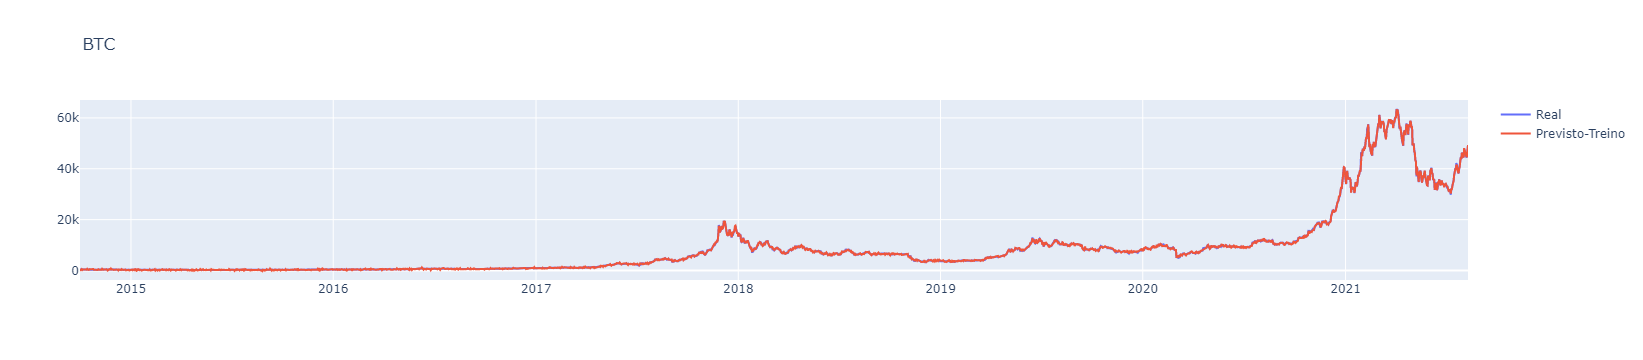

In [67]:
fig = go.Figure(layout=go.Layout(title=go.layout.Title(text='BTC'))) 
fig.add_trace(go.Scatter(x=X_BTC.index, y=y_BTC, name='Real'))
fig.add_trace(go.Scatter(x=X_BTC.index,  y=y_pred,  name='Previsto-Treino'))

fig.show()




Feature importance para BTC:


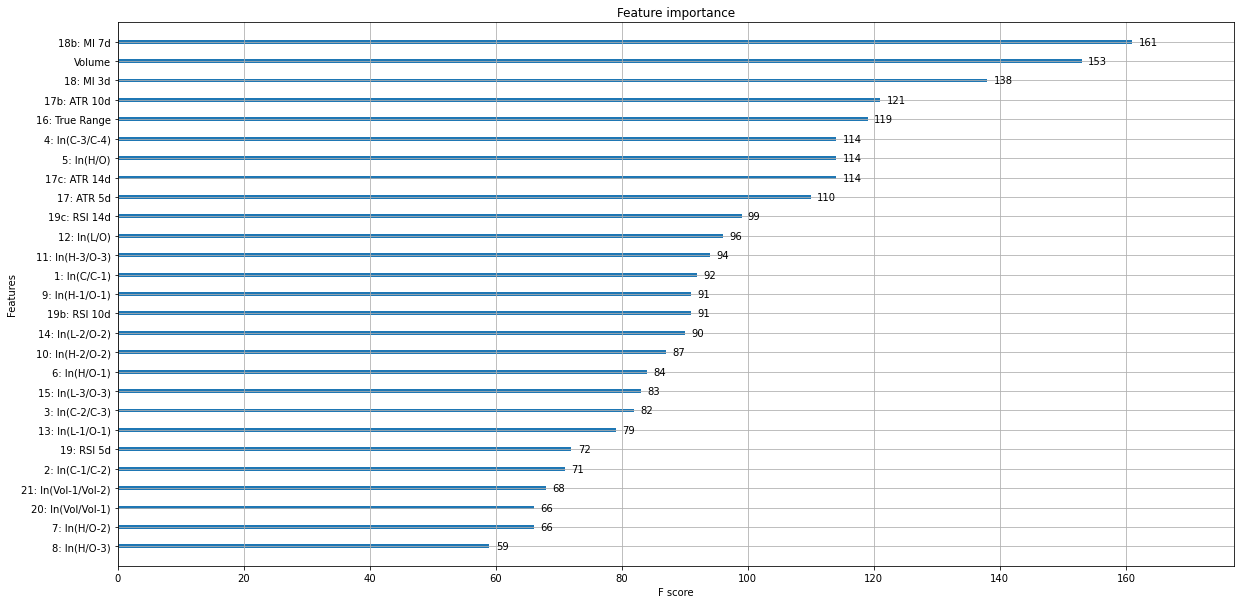

In [61]:
print ("\nFeature importance para BTC:")
plt.rcParams["figure.figsize"] = (20, 10)
plot_importance(modelo_BTC)
plt.show()

Modelos prontos para produção!